---
#### 제로베이스(https://zero-base.co.kr/)
#### 데이터사이언스 90일 완주반 
---
#### **Guideline**
- 총점 100점으로 주차별로 약 2~3개 문제가 제시됩니다
- 각 문제마다 안내사항과 요구사항을 꼼꼼하게 확인해주신 후, 코드를 작성해주세요 
- 코드는 제시드리는 결과만 같게 나온다면, 추후 모범답안으로 드리는 코드와 달라도 괜찮습니다 

#### **Notice!** 
- 제출 기한을 반드시 지켜주세요 
- 제출 전 코드가 정상적으로 실행되는지 검토해주세요
- 제출하신 코드에 대해 멘토님의 일부 주관적인 부분점수가 반영될 수 있습니다
- 부분점수 반영 시 상세한 피드백을 드릴 예정이오니, 문의가 있을시 멘토님과 담당 매니저님이 적극 소통할 예정입니다
---
# **10주차 과제**
- 총점 100점 3문제
---

### 1.아래 요구사항에 맞게 코드를 작성해주세요. (30점)
wine데이터의 머신러닝에 앞서 데이터 분석을 하고 있습니다. 
- 아래와 같은 결과가 나올 수 있게 와인 데이터의 특성 분포를 plot해주세요
- seaborn을 활용해주세요

**결과 예시**

![quiz_img1](https://user-images.githubusercontent.com/18084336/130345912-c9030e7f-019d-476e-ab19-eafc0110dc1d.png)


##### <힌트>

- print(wine)

##### <코드>

In [17]:
# 먼저 실행해주세요
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

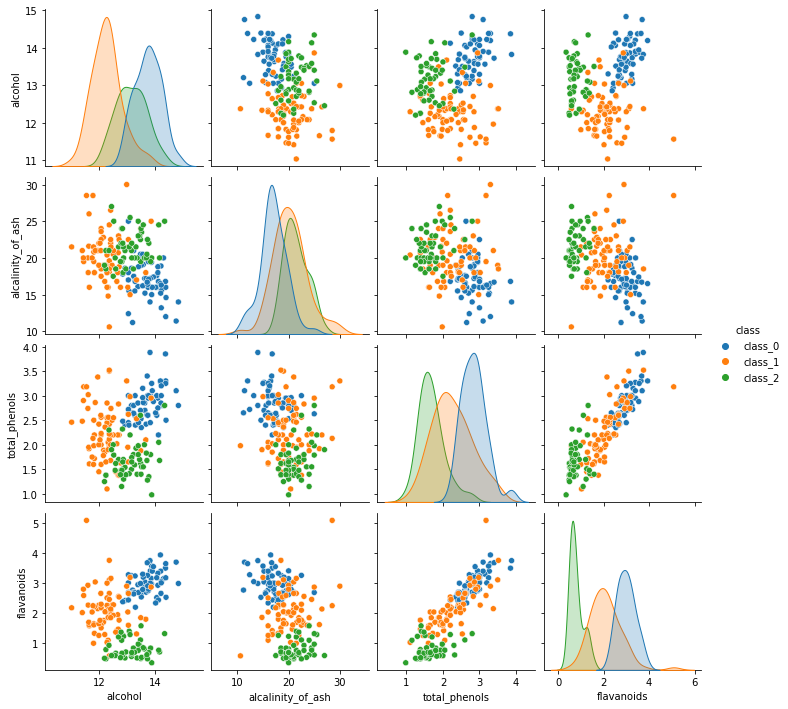

In [23]:
# 여기에 코드를 작성하세요
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.tail()

sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=df)
plt.show()
#print(wine)

---

### 2.아래 요구사항에 맞게 코드를 작성해주세요. (30점)
아래에는 iris 데이터를 로지스틱 회귀로 분류 문제를 풀어 roc 커브를 그리는 코드가 있습니다. 
- 일부 삭제한 코드를 채워넣어 plot까지 완성해주세요
- import가 안되는 모듈도 import 해주세요

**결과**
```
Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Aug 2021   Pseudo R-squ.:                  0.5368
Time:                        08:18:24   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113
================================================================================

confusion matrix
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

```
![quiz2](https://user-images.githubusercontent.com/18084336/130348098-81f6281d-c930-45cf-9f46-a282bf1c0723.png)

##### <코드>

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:                  0.5368
Time:                        12:37:23   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

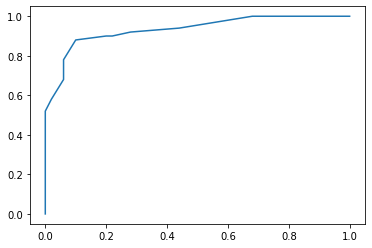

In [16]:
# 아래 코드를 작성하세요
from sklearn.datasets import load_iris
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.DataFrame(y, columns=["species"])
df = pd.concat([df_X, df_y], axis=1)
df = df[df.species.isin([0,1])]
df = df.rename(columns={'sepal length (cm)': "sepal_length"})
#model = sm.Logit(df_y, df_X)
model = sm.Logit.from_formula("species ~ sepal_length", data=df)
result = model.fit()
print(result.summary())

from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print()

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.show()

---

### 3.아래 요구사항에 맞게 코드를 작성해주세요. (40점)
MedGPA 데이터는 미국 의대생의 입학관련 데이터입니다. 
- PS, BS를 활용하여 acceptance를 회귀분석하세요
- statsmodel api를 사용해주세요
- Acceptance : 0 불합격/ 1 합격
- PS : Physical sciences
- BS : Biological sciences

**결과 예시**
```
Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Aug 2021   Pseudo R-squ.:                  0.3315
Time:                        09:04:32   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.316      1.518      0.129      -0.140       1.099
BS             1.1464      0.387      2.959      0.003       0.387       1.906
==============================================================================
```

##### <코드>

In [10]:
# 여기에 코드를 작성하세요
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

data = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

model_med = Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

#print()
#sns.stripplot(x="GPA", y="Acceptance", data=df_med,
#              jitter=True, orient='h', order=[1, 0])
#plt.grid(True)
#plt.show()

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Dec 2021   Pseudo R-squ.:                  0.3315
Time:                        12:24:01   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.